In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading dataset
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/SIC/COVID19_Analysis&Prediction/covid_data.csv')
#Identify Columns
data.head()

Mounted at /content/drive


,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,4/5/20,2/5/20,NaN,NaN,2.0,27,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,NaN
1,1009bf,2,1,19-03-2020,17-03-2020,NaN,NaN,2.0,24,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1,NaN
2,167386,1,2,6/4/20,1/4/20,NaN,2.0,2.0,54,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,1,2.0
3,0b5948,2,2,17-04-2020,10/4/20,NaN,2.0,1.0,30,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1,2.0
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2.0,2.0,60,2.0,...,2.0,1.0,2.0,1.0,2.0,2.0,2.0,NaN,1,2.0


## **Mô tả bộ dữ liệu:**
1. id: Mã số nhận dạng của bệnh nhân.
2. sex: Xác định giới tính của bệnh nhân, 1 là nữ và 2 là nam.
3. patient_typeại: Loại bệnh nhân, 1 là không nhập viện và 2 là nhập viện
4. entry_date: Ngày bệnh nhân đến bệnh viện.
5. date_symptoms: Ngày bệnh nhân bắt đầu xuất hiện các triệu chứng
6. date_died: Ngày bệnh nhân qua đời
7. intubed: chỉ bệnh nhân có đặt nội khí quản không. 1 biểu thị bệnh nhân đã sử dụng máy thở và 2 biểu thị bệnh nhân không sử dụng.
8. pneumonia - viêm phổi: Cho biết bệnh nhân đã bị viêm túi khí hay chưa. 1 là có, 2 là không
9.  age: Tuổi của bệnh nhân
10. pregnancy - mang thai: Cho biết bệnh nhân có thai hay không, “1” là có, “2” là không
11. diabetes - tiểu đường: Cho biết bệnh nhân có bị tiểu đường hay không, “1” là có, “2” là không
12. copd: Cho biết bệnh nhân có mắc bệnh phổi tắc nghẽn mãn tính (COPD) hay không, “1” là có, “2” là không,
13. asthma - hen suyễn: Cho biết bệnh nhân có bị hen suyễn hay không, “1” là có, “2” là không
14. inmsupr: Cho biết bệnh nhân có bị ức chế miễn dịch hay không, “1” là có, “2” là không
15. hypertension - tăng huyết áp: Cho biết bệnh nhân có bị tăng huyết áp hay không, “1” là có, “2” là không
16. other_disease: Cho biết bệnh nhân có mắc bệnh khác hay không, “1” là có, “2” là không.
17. cardiovascular - tim mạch: Cho biết liệu bệnh nhân có mắc bệnh tim hoặc mạch máu hay không, “1” cho có, “2” cho không
18. obesity - béo phì: Cho biết bệnh nhân có béo phì hay không, “1” là có, “2” là không
19. renal_chronic - thận mãn tính: Cho biết bệnh nhân có bệnh thận mãn tính hay không, “1” là có, “2” là không
20. tobacco - thuốc lá: Cho biết liệu bệnh nhân có phải là người sử dụng thuốc lá hay không, “1” là có, “2” là không.
21. contact_other_covid: Cho biết liệu bệnh nhân có tiếp xúc với bệnh nhân nhiễm Covid19 khác hay không.
22. icu: Cho biết liệu bệnh nhân có được đưa vào Đơn vị Chăm sóc Đặc biệt (ICU) hay không, “1” cho có, “2” cho không
23. Covid_res: 1 cho biết người đó dương tính với covid, 2 cho biết người đó là âm tính với covid, 3 cho biết kết quả đang chờ xử lý

In [ ]:
data.shape

(566602, 23)

In [ ]:
data.dtypes

,0
id,object
sex,int64
patient_type,int64
entry_date,object
date_symptoms,object
date_died,object
intubed,float64
pneumonia,float64
age,int64
pregnancy,float64


# **Tiền xử lý dữ liệu**

## **Duplicated Values**

In [ ]:
data.duplicated().sum()

0

Nhận xét: Bộ dữ liệu không có dữ liệu trùng

## **Dropping Irrelevant Fields**

In [3]:
data = data.drop(['id', 'date_symptoms','entry_date', 'date_died'], axis=1)
data.shape

(566602, 19)

## **Null Values**

In [ ]:
#Kiểm tra null value
data.isnull().sum()

,0
sex,0
patient_type,0
intubed,444813
pneumonia,11
age,0
pregnancy,288699
diabetes,1981
copd,1749
asthma,1752
inmsupr,1980


Nhận xét:
- Tỉ lệ null values ở cột intubed, icu chiếm 78,5% nên nhóm quyết định sẽ bỏ 2 cột này
- Các cột có null values chiếm dưới 5% nhóm sẽ thực hiện loại bỏ các records đó: pneumonia(0.002%), diabetes(0.35%), copd(0.31%), asthma(0.31%), inmsupr(0.35%), hypertension(0.27%), other_disease(0.46%), cardiovascular(0.32%), obesity(0.32%), renal_chronic(0.32%), tobacco(0,34%)
- Các cột có null values còn lại đều là biến phân loại và thiếu rất nhiều (pregnancy 50% và contact_other_covid 25%) nên nhóm quyết định thực hiện hồi quy để dự đoán các giá trị còn thiếu.


In [4]:
#Loại bỏ cột intubed, icu
data = data.drop(['intubed', 'icu'], axis=1)

#Loại bỏ các hàng chứa null values
data = data.dropna(subset=['pneumonia', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
                           'other_disease', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco'])

data.isnull().sum()

,0
sex,0
patient_type,0
pneumonia,0
age,0
pregnancy,286249
diabetes,0
copd,0
asthma,0
inmsupr,0
hypertension,0


In [5]:
#Để dự đoán các giá trị thiếu chính xác hơn cần chuyển các cột kiểu float64 sang kiểu int64
#Việc chuyển đổi này cần thay các giá trị NaN bằng 0, vì kiểu dữ liệu của NaN là float
#Vậy ta sẽ mặc định giá trị 0 ở cột pregnancy và cột contact_other_covid là giá trị thiếu
for column in data.columns:
    if data[column].dtype == 'float64':
        data[column] = data[column].fillna(0).astype(np.int64)
data.dtypes

,0
sex,int64
patient_type,int64
pneumonia,int64
age,int64
pregnancy,int64
diabetes,int64
copd,int64
asthma,int64
inmsupr,int64
hypertension,int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

#Dự đoán giá trị thiếu cho cột pregnancy
data1=data.copy()

le = LabelEncoder()
for column in data1.select_dtypes(include=['object', 'category']).columns:
    data1[column] = le.fit_transform([column])

features1=['sex', 'patient_type', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco']

df1 = data1[features1]
x_train1 = df1[df1['pregnancy']!=0].drop(columns='pregnancy')
y_train1 = df1[df1['pregnancy']!=0]['pregnancy']
x_test1 = df1[df1['pregnancy']==0].drop(columns='pregnancy')
y_test1 = df1[df1['pregnancy']==0]['pregnancy']

rf_model1 = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model1.fit(x_train1, y_train1)

predicted = rf_model1.predict(x_test1)
data1.pregnancy[data1['pregnancy']==0] = predicted

#Dự đoán giá trị thiếu cho cột contact_other_covid
data2=data.copy()

for column in data2.select_dtypes(include=['object', 'category']).columns:
    data2[column] = le.fit_transform([column])

features2=['sex', 'patient_type', 'pneumonia', 'age',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid']

df2 = data2[features2]
x_train2 = df2[df2['contact_other_covid']!=0].drop(columns='contact_other_covid')
y_train2 = df2[df2['contact_other_covid']!=0]['contact_other_covid']
x_test2 = df2[df2['contact_other_covid']==0].drop(columns='contact_other_covid')
y_test2 = df2[df2['contact_other_covid']==0]['contact_other_covid']

rf_model2 = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model2.fit(x_train2, y_train2)

predicted = rf_model2.predict(x_test2)
data2.contact_other_covid[data2['contact_other_covid']==0] = predicted

data['pregnancy'] = data1['pregnancy']
data['contact_other_covid'] = data2['contact_other_covid']

print(data['pregnancy'].value_counts())
print(data['contact_other_covid'].value_counts())

pregnancy
2    558463
1      4184
Name: count, dtype: int64
contact_other_covid
1    331628
2    231019
Name: count, dtype: int64


## **Outliers**

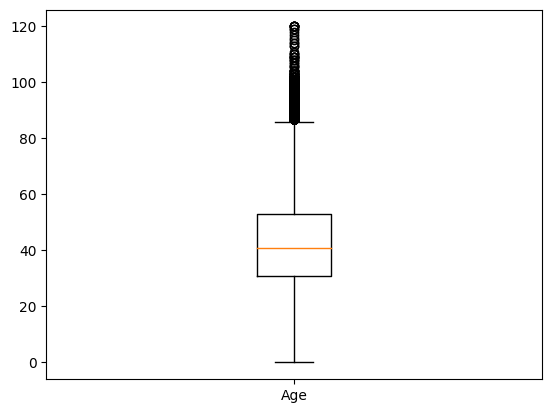

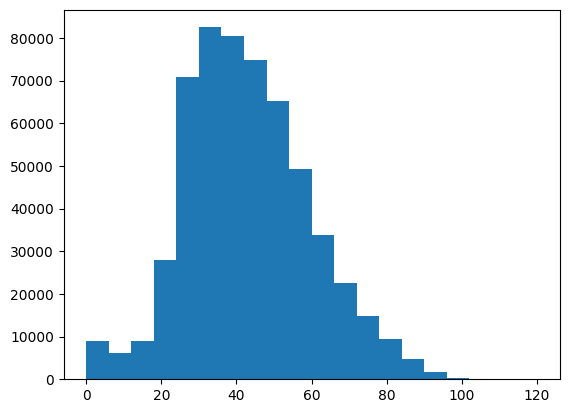

Số lượng outlier cột age:
age
False    558631
True       4016
Name: count, dtype: int64
Các giá trị của cột age: 
age
30     14536
31     13847
36     13835
37     13772
38     13751
       ...  
118        1
115        1
117        1
116        1
105        1
Name: count, Length: 120, dtype: int64




In [6]:
# Kiểm tra outlier ở cột age
#Boxplot
plt.boxplot(data['age'], labels = ['Age'], showfliers = True)
plt.show()
#Histogram
plt.hist(data['age'], bins = 20)
plt.show()
#Số lượng outliers ở cột age
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
outliers = ((data['age'] < lower_limit) | (data['age'] > upper_limit))
print("Số lượng outlier cột age:")
print(outliers.value_counts())

print("Các giá trị của cột age: ")
print(data['age'].value_counts())
print("\n")

In [7]:
data['patient_type'].value_counts()

,count
patient_type,
1,442343
2,120304


Nhận xét:

Từ histogram ta thấy dữ liệu bị lệch phải (có điểm ngoại lệ lệch nhiều về bên phải, hoặc “đuôi” của histogram nằm ở bên phải). Từ boxplot ta thấy có khá nhiều điểm được coi là ngoại lệ.

**Nhận xét**:
- Các cột không có outliers: sex, contact_other_covid, covid_res (Các cột này chỉ có 2 giá trị, có thể hiểu rằng 2 giá trị này xấp xỉ hoặc gần bằng nhau)
- Cột age có khá nhiều outliers với nhiều giá trị khác nhau. Điều này khá dễ hiểu vì cột age chứa các giá trị liên tục, ở độ tuổi nào cũng có thể mắc covid và dataset của nhóm khá nhiều (hơn 500000 records) nên việc có các giá trị nằm ngoài tứ vị phân là điều dễ hiểu
- Các cột patient_type, pneumonia, pregnancy, diabetes, copd, asthma, inmsupr, hypertension, other_disease, cardiovascular, obesity, renal_chronic, tobacco, contact_other_covid vẫn có nhiều outliers và các giá trị này trùng nhau. Lý do vì đây là các cột chưa các biến phân loại (1 và 2) dẫn đến giá trị tứ nhị phân sẽ nhỏ và dễ chệch về phía giá trị chiếm % cao hơn giá trị còn lại (ví dụ ở cột asthma giá trị 2 gấp 30 lần giá trị 1 dẫn đến các giá trị tứ vị phân chênh về giá trị 2, nhìn vào boxplot t có thể thấy rõ outlier dường như đều là giá trị 1. Các cột khác cũng tương tự).

**Kết luận**: Mặc dù các giá trị outlier là rất nhiều tuy nhiên ta có thể giải thích được chúng và với số lượng outlier nhiều như thế, việc loại bỏ hết các outlier sẽ dẫn đến khi train model có thể không rõ ràng, chính xác vì chúng chứa nhiều tri thức và vẫn có thể là những giá trị hợp lệ


## **Chuẩn hoá dữ liệu**

### **Cột covid_res**

Giải thích các giá trị ở cột covid_res
1. positive: mắc bệnh
2. negative: chưa mắc bệnh
3. awaitinga: chờ kết quả

Để thuận tiện hơn ta sẽ thay 1, 2, 3 thành 1, 0, 2

In [ ]:
data['covid_res'].replace([1,2,3],[1,0,2],inplace=True)
data['covid_res'].value_counts()

,count
covid_res,
0,277389
1,218902
2,66356


Vì chúng ta đang tập trung vào xem xét các yếu tố bị ảnh hưởng bởi corona, nên trọng tâm chính của chúng ta sẽ là mắc bệnh hoặc không mắc bệnh, do đó chúng ta sẽ bỏ qua chờ kết quả.

Bây giờ tôi sẽ xóa tất cả các hàng có giá trị là 2

In [ ]:
data = data[data['covid_res']!=2]
data['covid_res'].value_counts()

,count
covid_res,
0,277389
1,218902


In [ ]:
data.shape

(496291, 17)

In [ ]:
data.head()

,sex,patient_type,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
0,2,1,2,27,2,2,2,2,2,2,2,2,2,2,2,2,1
1,2,1,2,24,2,2,2,2,2,2,2,2,2,2,2,1,1
2,1,2,2,54,2,2,2,2,2,2,2,2,1,2,2,2,1
3,2,2,1,30,2,2,2,2,2,2,2,2,2,2,2,2,1
4,1,2,2,60,2,1,2,2,2,1,2,1,2,2,2,1,1


## **Lưu dataset đã xử lý thành file .csv**

In [ ]:
data.to_csv('/content/drive/MyDrive/SIC/COVID19_Analysis&Prediction/final_data.csv', index=False)

## **Dữ liệu sau xử lý**

In [ ]:
data.shape

(496291, 17)

In [ ]:
data.head()

,sex,patient_type,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
0,2,1,2,27,2,2,2,2,2,2,2,2,2,2,2,2,1
1,2,1,2,24,2,2,2,2,2,2,2,2,2,2,2,1,1
2,1,2,2,54,2,2,2,2,2,2,2,2,1,2,2,2,1
3,2,2,1,30,2,2,2,2,2,2,2,2,2,2,2,2,1
4,1,2,2,60,2,1,2,2,2,1,2,1,2,2,2,1,1


In [ ]:
data.tail()

,sex,patient_type,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
499687,2,1,1,77,2,2,2,2,2,2,1,2,2,2,1,2,0
499688,2,2,1,63,2,2,2,2,2,1,2,2,1,2,1,2,0
499689,1,1,2,25,2,2,2,2,2,2,2,2,2,2,2,2,0
499690,1,1,2,45,2,2,2,2,2,1,2,2,2,2,2,1,0
499691,1,1,2,51,2,2,2,2,2,2,2,2,2,2,2,1,0


In [ ]:
data.describe()

,sex,patient_type,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
count,562647.000000,562647.000000,562647.000000,562647.000000,562647.000000,562647.000000,562647.000000,562647.000000,562647.000000,562647.000000,562647.000000,562647.000000,562647.000000,562647.000000,562647.000000,562647.000000,562647.000000
mean,1.506214,1.213818,1.845615,42.586243,1.992564,1.875021,1.983928,1.968110,1.984207,1.836660,1.969851,1.977522,1.837166,1.980169,1.915151,1.410593,1.728878
std,0.499962,0.410000,0.361317,16.640004,0.085913,0.330695,0.125754,0.175708,0.124675,0.369676,0.170996,0.148231,0.369214,0.139420,0.278657,0.491942,0.658397
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,1.000000,2.000000,41.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,2.000000,1.000000,2.000000,53.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000,120.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000


## **Tài liệu tham khảo**
- https://viblo.asia/p/xu-ly-missing-data-trong-data-analysis-maGK7qaAlj2#_su-dung-mo-hinh-du-doan-cho-data-impution-13